**Exploratory Data Analysis on Indian Premier League**

**Dataset Link : https://bit.ly/34SRn3b**

**Importing Required Libraries :**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
match_data = pd.read_csv("matches.csv")
match_data.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [3]:
deliveries_data = pd.read_csv("deliveries.csv")
deliveries_data.head(3)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [4]:
season_data = match_data[['id', 'season', 'winner']]
season_data.head(2)

,id,season,winner
0,1,2017,Sunrisers Hyderabad
1,2,2017,Rising Pune Supergiant


In [5]:
complete_data = deliveries_data.merge(season_data, how = 'inner', left_on = 'match_id', right_on = 'id')
complete_data.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,id,season,winner
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad


In [6]:
match_data.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [7]:
match_data = match_data.drop(columns = ['umpire3'], axis = 1)
match_data.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi


In [8]:
winner_per_season = match_data.groupby('season')['winner'].value_counts()
winner_per_season

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

**Matches Played in each IPL Season :**

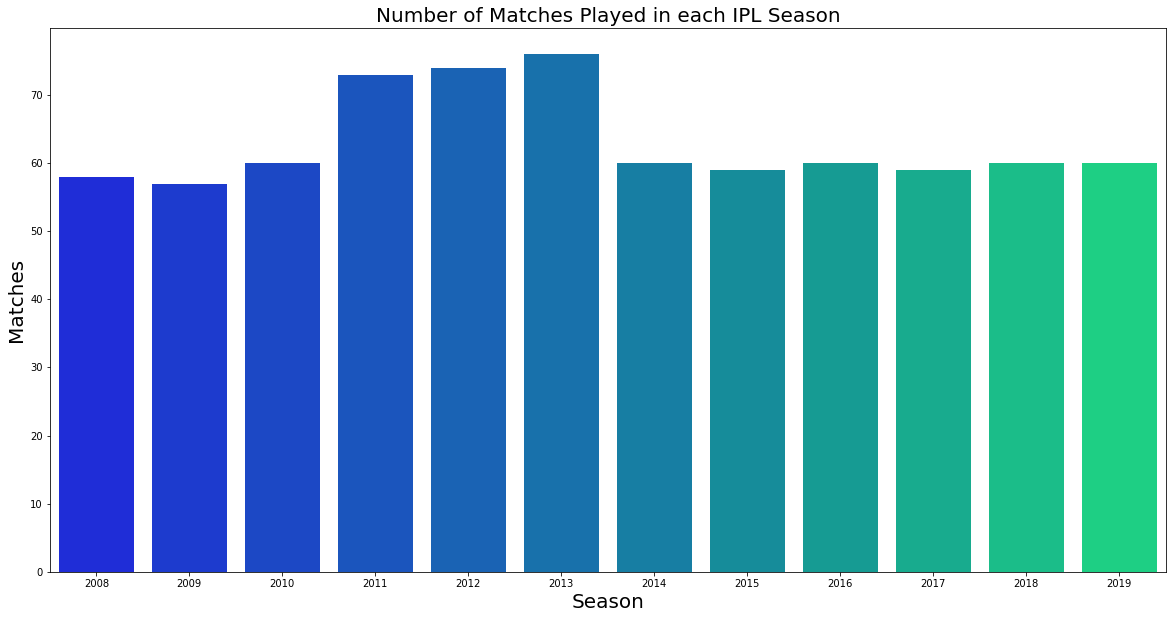

In [9]:
plt.figure(figsize = (20, 10))
sns.countplot(match_data['season'], data = match_data, palette = 'winter')
plt.title("Number of Matches Played in each IPL Season", fontsize = 20)
plt.xlabel("Season", fontsize = 20)
plt.ylabel("Matches", fontsize = 20)
plt.show()

**Number of Matches Won by Team :**

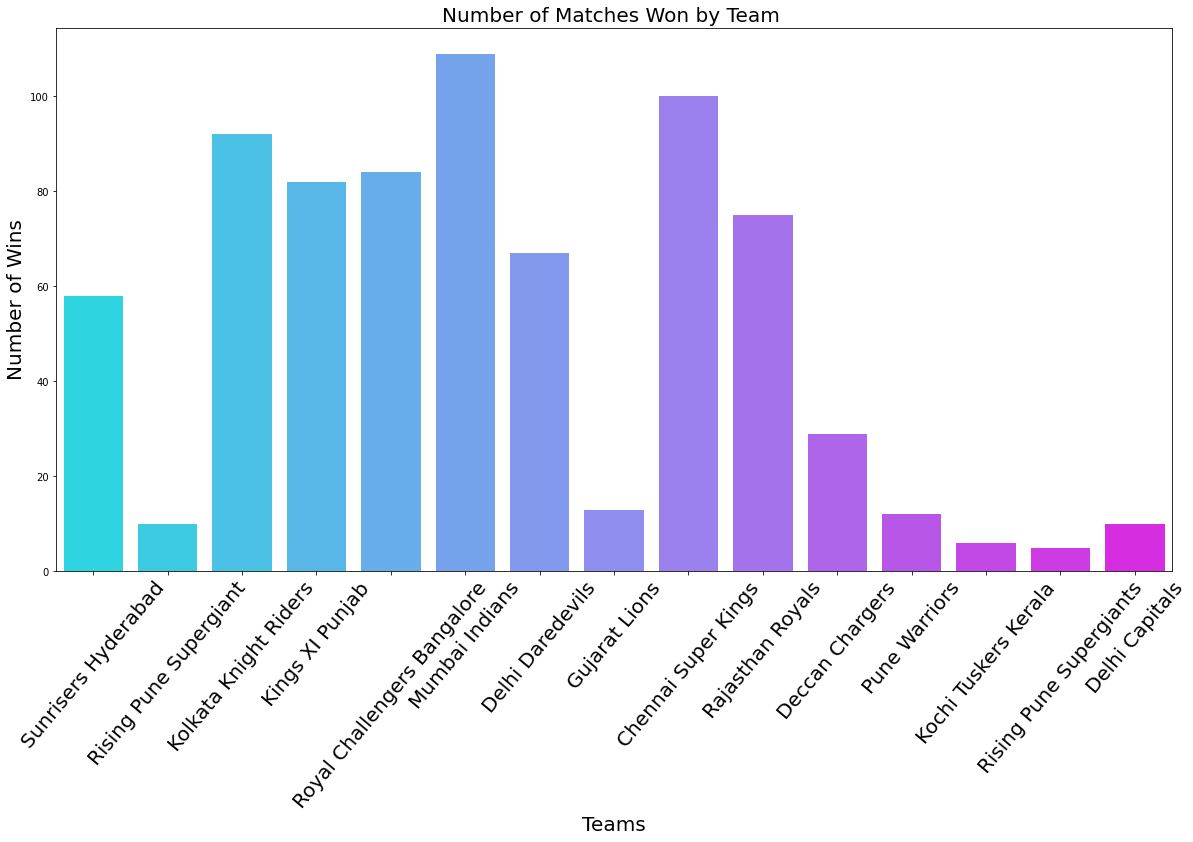

In [10]:
plt.figure(figsize = (20, 10))
sns.countplot(match_data['winner'], data = match_data, palette = 'cool')
plt.title("Number of Matches Won by Team ", fontsize = 20)
plt.xlabel("Teams", fontsize = 20)
plt.xticks(rotation = 50, fontsize = 20)
plt.ylabel("Number of Wins", fontsize = 20)
plt.show()

**Match Result :**

In [11]:
match_data['win_by'] = np.where(match_data['win_by_runs']>0, 'Bat first', 'Bowl first')

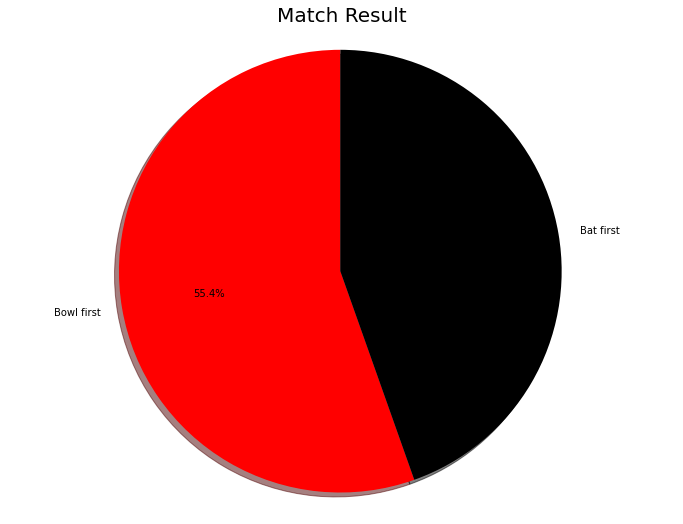

In [12]:

win_data = match_data.win_by.value_counts()
labels = np.array(win_data.index)
sizes = win_data.values

colors = ['red', 'black']
plt.figure(figsize = (12, 9))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True,startangle=90)
plt.title("Match Result", fontsize = 20)
plt.axis('equal')
plt.show()

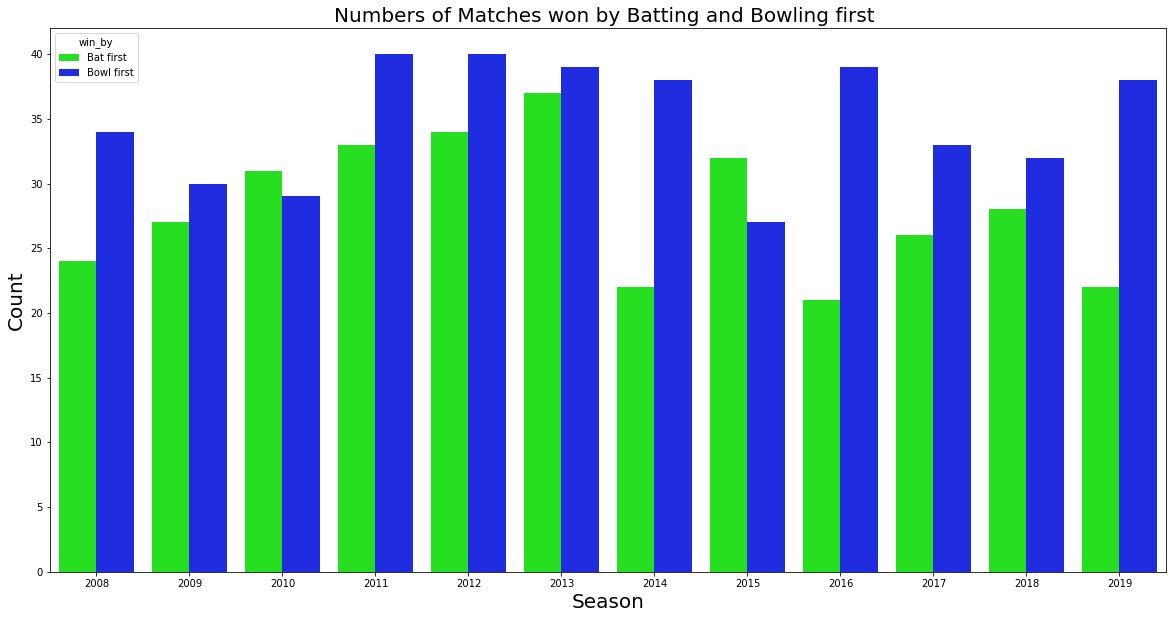

In [13]:
plt.figure(figsize = (20,10))
sns.countplot('season',hue = 'win_by',data = match_data, palette = 'hsv')
plt.title("Numbers of Matches won by Batting and Bowling first ",fontsize = 20)
plt.xlabel("Season",fontsize = 20)
plt.ylabel("Count",fontsize = 20)
plt.show()

**Toss Result :**

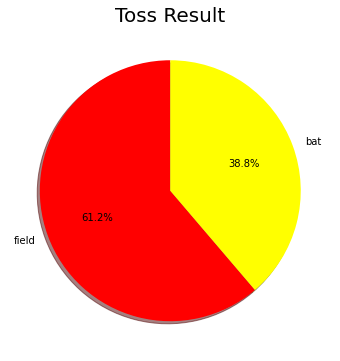

In [14]:
Toss = match_data.toss_decision.value_counts()
labels = np.array(Toss.index)
sizes = Toss.values
colors = ['red', 'yellow']
plt.figure(figsize = (12, 6))
plt.pie(sizes, labels = labels, colors = colors, autopct = "%1.1f%%", shadow = True, startangle = 90)
plt.title("Toss Result", fontsize = 20)
plt.show()

**Number of Matches Won by Toss Result :**

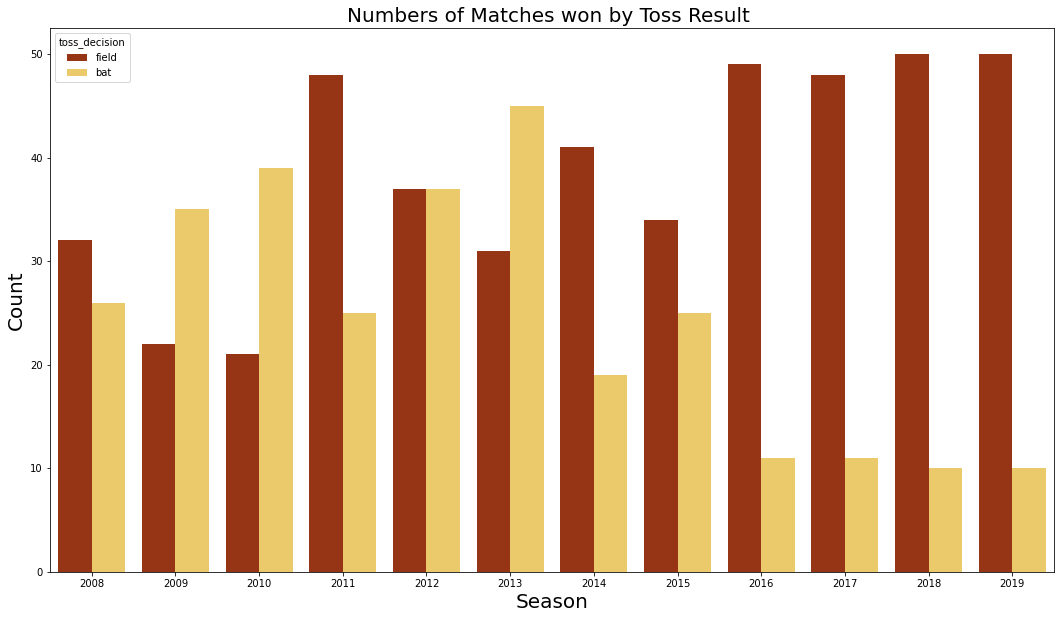

In [15]:
plt.figure(figsize = (18,10))
sns.countplot('season',hue = 'toss_decision',data = match_data, palette = 'afmhot')
plt.title("Numbers of Matches won by Toss Result ",fontsize = 20)
plt.xlabel("Season",fontsize = 20)
plt.ylabel("Count",fontsize = 20)
plt.show()

**Season wise Winner :**

In [16]:
f_match = match_data.drop_duplicates(subset = ['season'])
f_match[['season', 'winner']].reset_index(drop = True).sort_values('season')

,season,winner
1,2008,Kolkata Knight Riders
2,2009,Mumbai Indians
3,2010,Kolkata Knight Riders
4,2011,Chennai Super Kings
5,2012,Mumbai Indians
6,2013,Kolkata Knight Riders
7,2014,Kolkata Knight Riders
8,2015,Kolkata Knight Riders
9,2016,Rising Pune Supergiants
0,2017,Sunrisers Hyderabad


**Final Match Result :**

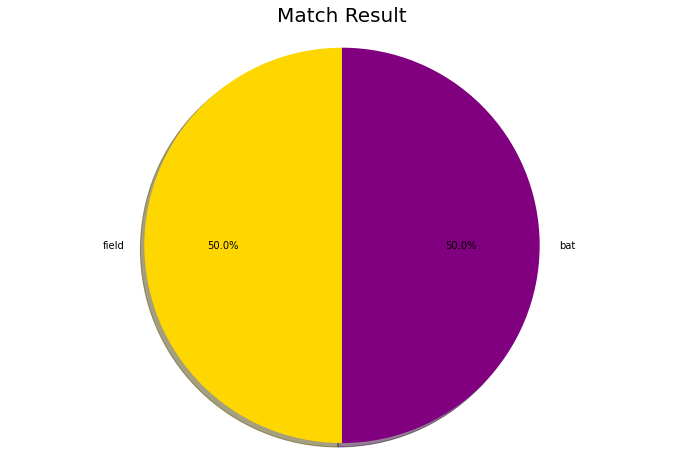

In [17]:
match = f_match.win_by.value_counts()
labels = np.array(Toss.index)
sizes = match.values
colors = ['gold', 'purple']
plt.figure(figsize = (12,8))
plt.pie(sizes, labels = labels, colors = colors, autopct='%1.1f%%', shadow=True,startangle = 90)
plt.title('Match Result',fontsize = 20)
plt.axis('equal')
plt.show()


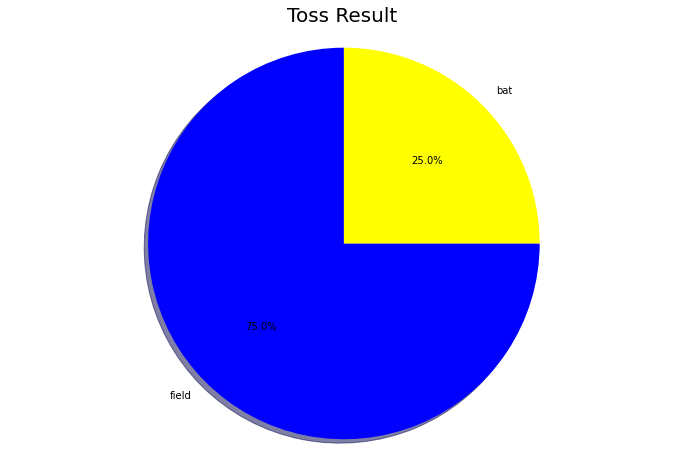

In [18]:
Toss=f_match.toss_decision.value_counts()
labels = np.array(Toss.index)
sizes = Toss.values
colors = ['blue', 'yellow']
plt.figure(figsize = (12,8))
plt.pie(sizes, labels = labels, colors = colors, autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.title('Toss Result',fontsize = 20)
plt.axis('equal')
plt.show()


**Top Player in IPL :**

<Figure size 1440x720 with 0 Axes>

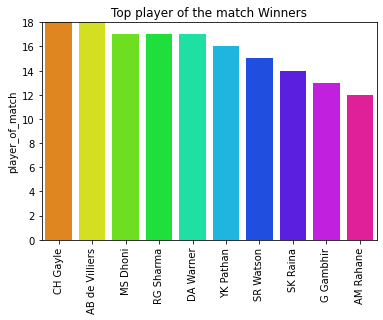

In [19]:
plt.figure(figsize = (20,10))
top_player = match_data.player_of_match.value_counts()[:10]
fig, xy = plt.subplots()
xy.set_ylim([0,18])
xy.set_ylabel("Count")
xy.set_title("Top player of the match Winners")
top_player.plot.bar()
sns.barplot(x = top_player.index, y = top_player, orient='v', palette="hsv");
plt.show()

In [20]:
f_match.groupby(['city','winner']).size()

city       winner                 
Abu Dhabi  Kolkata Knight Riders      1
Bangalore  Kolkata Knight Riders      1
Cape Town  Mumbai Indians             1
Chennai    Chennai Super Kings        2
           Mumbai Indians             1
Hyderabad  Sunrisers Hyderabad        1
Kolkata    Kolkata Knight Riders      2
Mumbai     Chennai Super Kings        1
           Kolkata Knight Riders      1
           Rising Pune Supergiants    1
dtype: int64

In [21]:
f_match[['toss_winner','toss_decision','winner']].reset_index(drop=True)

,toss_winner,toss_decision,winner
0,Royal Challengers Bangalore,field,Sunrisers Hyderabad
1,Royal Challengers Bangalore,field,Kolkata Knight Riders
2,Chennai Super Kings,field,Mumbai Indians
3,Deccan Chargers,field,Kolkata Knight Riders
4,Chennai Super Kings,bat,Chennai Super Kings
5,Mumbai Indians,field,Mumbai Indians
6,Kolkata Knight Riders,field,Kolkata Knight Riders
7,Kolkata Knight Riders,bat,Kolkata Knight Riders
8,Kolkata Knight Riders,field,Kolkata Knight Riders
9,Mumbai Indians,bat,Rising Pune Supergiants


In [22]:
f_match[['winner','player_of_match']].reset_index(drop=True)


,winner,player_of_match
0,Sunrisers Hyderabad,Yuvraj Singh
1,Kolkata Knight Riders,BB McCullum
2,Mumbai Indians,SR Tendulkar
3,Kolkata Knight Riders,AD Mathews
4,Chennai Super Kings,S Anirudha
5,Mumbai Indians,RE Levi
6,Kolkata Knight Riders,SP Narine
7,Kolkata Knight Riders,JH Kallis
8,Kolkata Knight Riders,M Morkel
9,Rising Pune Supergiants,AM Rahane


**Number of Six hit by Team :**

In [23]:
Six_data = complete_data[complete_data['batsman_runs'] == 6]
Six_data.groupby('batting_team')['batsman_runs'].agg([('run by six', 'sum'), ('sixes', 'count')])

,run by six,sixes
batting_team,,
Chennai Super Kings,5838,973
Deccan Chargers,2400,400
Delhi Capitals,522,87
Delhi Daredevils,4806,801
Gujarat Lions,930,155
Kings XI Punjab,5856,976
Kochi Tuskers Kerala,318,53
Kolkata Knight Riders,5580,930
Mumbai Indians,6576,1096


**Six hit by Players :**

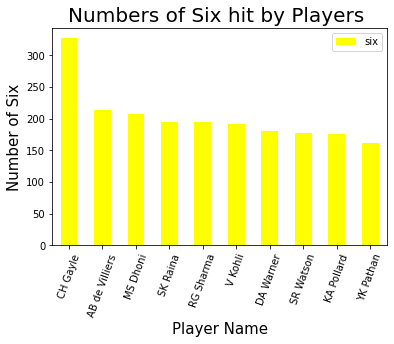

In [24]:
batsman_six=Six_data.groupby('batsman')['batsman_runs'].agg([('six','count')]).reset_index().sort_values('six',ascending=0)
ax = batsman_six.iloc[:10,:].plot('batsman','six',kind='bar',color='yellow')
plt.title("Numbers of Six hit by Players ",fontsize=20)
plt.xticks(rotation=70)
plt.xlabel("Player Name",fontsize = 15)
plt.ylabel("Number of Six",fontsize = 15)
plt.show()

**Number of Six hit in Each Season :**

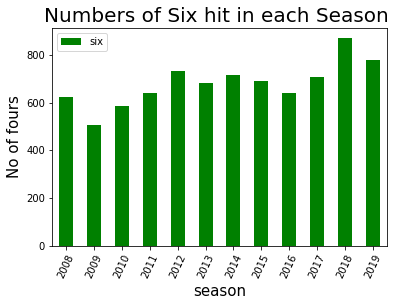

In [25]:
axy = Six_data.groupby('season')['batsman_runs'].agg([('six','count')]).reset_index().plot('season','six',kind='bar',color = 'green')
plt.title("Numbers of Six hit in each Season ",fontsize = 20)
plt.xticks(rotation = 65)
plt.xlabel("season",fontsize = 15) 
plt.ylabel("No of fours",fontsize = 15)
plt.show()

**Number of Four hit by Team :**

In [26]:
four_data=complete_data[complete_data['batsman_runs']==4]
four_data.groupby('batting_team')['batsman_runs'].agg([('runs by fours','sum'),('fours','count')])


,runs by fours,fours
batting_team,,
Chennai Super Kings,8772,2193
Deccan Chargers,3828,957
Delhi Capitals,968,242
Delhi Daredevils,8632,2158
Gujarat Lions,1840,460
Kings XI Punjab,9832,2458
Kochi Tuskers Kerala,680,170
Kolkata Knight Riders,9736,2434
Mumbai Indians,10352,2588


**Four Hit by Players :**

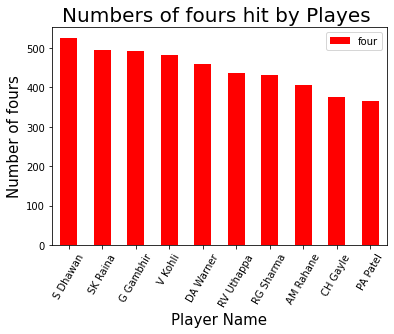

In [27]:
hit_four = four_data.groupby('batsman')['batsman_runs'].agg([('four','count')]).reset_index().sort_values('four',ascending=0)
xy = hit_four.iloc[:10,:].plot('batsman','four',kind = 'bar',color = 'Red')
plt.title("Numbers of fours hit by Playes ", fontsize = 20)
plt.xticks(rotation = 60)
plt.xlabel("Player Name",fontsize = 15)
plt.ylabel("Number of fours",fontsize = 15)
plt.show()


**Number of Fours hit in Each Season :**

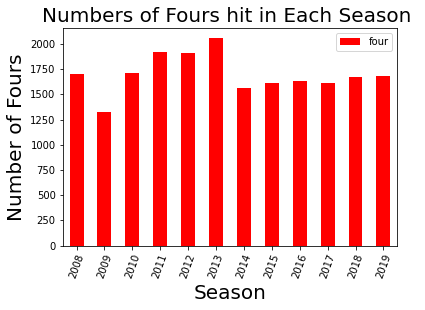

In [28]:
abc = four_data.groupby('season')['batsman_runs'].agg([('four','count')]).reset_index().plot('season','four',kind='bar',color = 'red')
plt.title("Numbers of Fours hit in Each Season ",fontsize = 20)
plt.xticks(rotation = 70)
plt.xlabel("Season",fontsize = 20)
plt.ylabel("Number of Fours",fontsize = 20)
plt.show()


**Number of Matches Played by Batsman :**

In [29]:
No_Matches_player= deliveries_data[["match_id","player_dismissed"]]
No_Matches_player =No_Matches_player .groupby("player_dismissed")["match_id"].count().reset_index().sort_values(by="match_id",ascending=False).reset_index(drop=True)
No_Matches_player.columns=["batsman", "No_of Matches"]
No_Matches_player .head(3)

,batsman,No_of Matches
0,SK Raina,162
1,RG Sharma,155
2,RV Uthappa,153


**Top 10 Leading Score in IPL :**

In [30]:
bats_score = deliveries_data.groupby('batsman')['batsman_runs'].agg(['sum']).reset_index().sort_values('sum',ascending=False).reset_index(drop=True)
batsman_score=bats_score.rename(columns={'sum':'batsman_runs'})
print("Top 10 Leading Run Scorer in IPL")
batsman_score.iloc[:10,:]

Top 10 Leading Run Scorer in IPL


,batsman,batsman_runs
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,DA Warner,4741
4,S Dhawan,4632
5,CH Gayle,4560
6,MS Dhoni,4477
7,RV Uthappa,4446
8,AB de Villiers,4428
9,G Gambhir,4223


Conclusion:
1. Highest number of 4 Hit by player is S.Dhawan.
2. Highest number of 6 Hit by player is CH Gayle.
3. Top Player of Match Winning are CH Gayle, AB de Villers.
4. Top Leading Run Scorer in IPL are Virat  Kohli, SK Raina, RG Sharma.
5. After winning toss more teams decide to do fielding first.